<a href="https://colab.research.google.com/github/TrinaBan0807/icaai/blob/main/ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Sample.csv to Sample (2).csv

Columns found in file:
['value', 'y_true', 'y_score']

Enter column name for Mean/Median calculation: value
Enter column name for TRUE labels (0/1): y_true
Enter column name for predicted scores/probabilities: y_score

Mean of value: 37.0
Median of value: 37.5

AUC (Area Under ROC Curve): 1.0


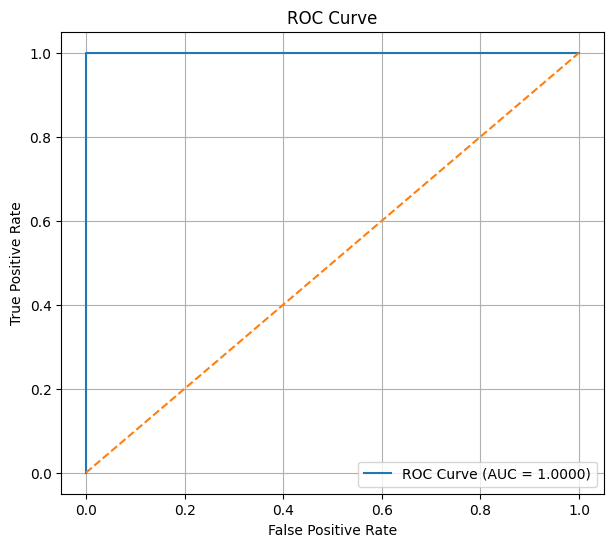


Choose graph type for value column:
1 - Bar Graph
2 - Histogram
3 - Line Graph

Enter choice (1/2/3): 1


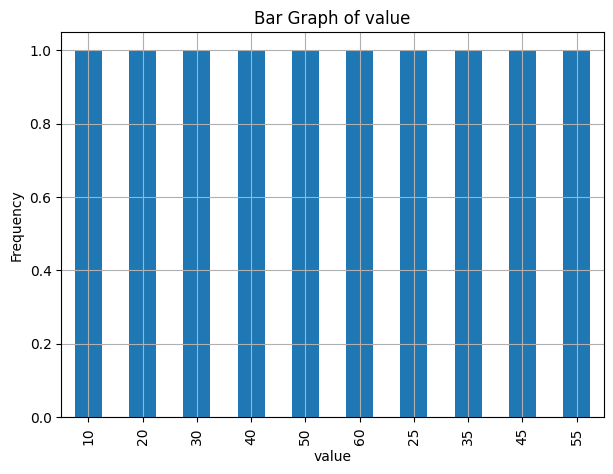

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from io import BytesIO

# ---------------------------------------
# Step 1: Upload File Directly
# ---------------------------------------
from google.colab import files
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Determine file type and load
if file_name.endswith(".csv"):
    df = pd.read_csv(BytesIO(uploaded[file_name]))
elif file_name.endswith(".xls") or file_name.endswith(".xlsx"):
    df = pd.read_excel(BytesIO(uploaded[file_name]))
else:
    raise ValueError("Unsupported file format! Upload a CSV or Excel file.")

print("\nColumns found in file:")
print(df.columns.tolist())

# ---------------------------------------
# Step 2: Ask user for column names
# ---------------------------------------
value_column = input("\nEnter column name for Mean/Median calculation: ").strip()
true_col = input("Enter column name for TRUE labels (0/1): ").strip()
score_col = input("Enter column name for predicted scores/probabilities: ").strip()

# ---------------------------------------
# Step 3: Mean + Median
# ---------------------------------------
mean_val = df[value_column].mean()
median_val = df[value_column].median()

print(f"\nMean of {value_column}: {mean_val}")
print(f"Median of {value_column}: {median_val}")

# ---------------------------------------
# Step 4: ROC Curve Calculation
# ---------------------------------------
y_true = df[true_col]
y_score = df[score_col]

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

print(f"\nAUC (Area Under ROC Curve): {roc_auc}")

# ---------------------------------------
# Step 5: Plot ROC Curve
# ---------------------------------------
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# Step 6: Graph Type Selection
# ---------------------------------------
print("\nChoose graph type for value column:")
print("1 - Bar Graph")
print("2 - Histogram")
print("3 - Line Graph")

choice = input("\nEnter choice (1/2/3): ").strip()

plt.figure(figsize=(7, 5))

if choice == "1":
    df[value_column].value_counts().plot(kind='bar')
    plt.title(f"Bar Graph of {value_column}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")

elif choice == "2":
    plt.hist(df[value_column], bins=20)
    plt.title(f"Histogram of {value_column}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")

elif choice == "3":
    plt.plot(df[value_column])
    plt.title(f"Line Graph of {value_column}")
    plt.xlabel("Index")
    plt.ylabel(value_column)

else:
    print("Invalid choice! Showing histogram by default.")
    plt.hist(df[value_column], bins=20)
    plt.title(f"Histogram of {value_column}")

plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from io import BytesIO

# ---------------------------------------
# Step 1: Upload File Directly
# ---------------------------------------
from google.colab import files
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Determine file type and load
if file_name.endswith(".csv"):
    df = pd.read_csv(BytesIO(uploaded[file_name]))
elif file_name.endswith(".xls") or file_name.endswith(".xlsx"):
    df = pd.read_excel(BytesIO(uploaded[file_name]))
else:
    raise ValueError("Unsupported file format! Upload a CSV or Excel file.")

print("\nColumns found in file:")
print(df.columns.tolist())

# ---------------------------------------
# Step 2: Ask user for column names
# ---------------------------------------
value_column = input("\nEnter column name for Mean/Median calculation: ").strip()
true_col = input("Enter column name for TRUE labels (0/1): ").strip()
score_col = input("Enter column name for predicted scores/probabilities: ").strip()

# ---------------------------------------
# Step 3: Mean + Median
# ---------------------------------------
mean_val = df[value_column].mean()
median_val = df[value_column].median()

print(f"\nMean of {value_column}: {mean_val}")
print(f"Median of {value_column}: {median_val}")

# ---------------------------------------
# Step 4: ROC Curve Calculation
# ---------------------------------------
# FIX: Ensure the correct columns are used for y_true (binary labels) and y_score (predicted probabilities)
y_true = df['y_true'] # Corrected: Use the actual binary labels column from the dataframe
y_score = df['y_score'] # Corrected: Use the actual predicted scores column from the dataframe

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

print(f"\nAUC (Area Under ROC Curve): {roc_auc}")

# ---------------------------------------
# Step 5: Plot ROC Curve
# ---------------------------------------
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# Step 6: Graph Type Selection
# ---------------------------------------
print("\nChoose graph type for value column:")
print("1 - Bar Graph")
print("2 - Histogram")
print("3 - Line Graph")

choice = input("\nEnter choice (1/2/3): ").strip()

plt.figure(figsize=(7, 5))

if choice == "1":
    df[value_column].value_counts().plot(kind='bar')
    plt.title(f"Bar Graph of {value_column}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")

elif choice == "2":
    plt.hist(df[value_column], bins=20)
    plt.title(f"Histogram of {value_column}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")

elif choice == "3":
    plt.plot(df[value_column])
    plt.title(f"Line Graph of {value_column}")
    plt.xlabel("Index")
    plt.ylabel(value_column)

else:
    print("Invalid choice! Showing histogram by default.")
    plt.hist(df[value_column], bins=20)
    plt.title(f"Histogram of {value_column}")

plt.grid(True)
plt.show()